In [5]:
#搭建简单的神经网络架构并运行
import tensorflow as tf
import numpy as np
#创建用于训练的数据
x_data = np.random.rand(100).astype('float32')
y_data = x_data*0.3 + 0.1

#创建训练的初始权重和偏差
weights = tf.Variable(np.random.uniform([1],-1,1))#tensorflow的变量需要用tf.Variable声明
biases = tf.Variable(np.zeros([1])+0.9)
y = weights*x_data + biases

#创建激励函数
loss = tf.reduce_mean(tf.square(y-y_data))#误差值用平均方差衡量
optimizer = tf.train.GradientDescentOptimizer(0.5)#用梯度下降法寻找最优解
train = optimizer.minimize(loss)#求loss的最小值
#首先要将所有变量初始化
init = tf.global_variables_initializer()
#创建用于训练的会话
#运行init和train，以便先对变量初始化再进行训练
sess = tf.Session()
sess.run(init)
for i in range(200):
    sess.run(train)
    if i%20==0:
        print(i, sess.run(weights), sess.run(biases))#sess.run(weights)和sess.run(biases)分别输出权重和偏差值

0 [-0.36994751] [0.30249012]
20 [0.13896331] [0.18705533]
40 [0.25700422] [0.12324323]
60 [0.2885204] [0.1062058]
80 [0.29693502] [0.10165691]
100 [0.29918168] [0.10044239]
120 [0.29978152] [0.10011812]
140 [0.29994167] [0.10003154]
160 [0.29998443] [0.10000842]
180 [0.29999585] [0.10000225]


In [1]:

import os
from tensorflow.python.client import device_lib
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"
 
if __name__ == "__main__":
    print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12892910911747479951
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1422143897
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6422427159420946981
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [10]:
#tensorflow都需要Session来控制输入和输出
import tensorflow as tf
matrix = tf.constant([3, 3])#tf.constant（）传入一个常数张量

sess = tf.Session()
print(sess.run(matrix))
sess.close()
with tf.Session() as sess:
    print(sess.run(matrix))

[3 3]
[3 3]


In [15]:
#tensorflow的变量需要通过Variable定义，否则无法成为变量
import tensorflow as tf

state = tf.Variable(0, name = 'counter') # name 对变量命名
c = tf.constant(1)

new_value = tf.add(state, c)
f = tf.assign(state, new_value)#将new_value加载到state上

init = tf.global_variables_initializer()#定义了新的变量后一定要对所有变量初始化
with tf.Session() as sess:
    sess.run(init)
    for i in range(3):
        print(sess.run(f))
        #也可以run（f）后直接输出state如下
        print(sess.run(state))

1
1
2
2
3
3


In [5]:
#tensorflow可以用placeholder进行占位，这样在还为获得数据时先将模型流程写完，等运行时用feed_dict获取
import tensorflow as tf

input1 = tf.placeholder('float32')
input2 = tf.placeholder('float32')
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: [2.], input2: [3.1]}))

[6.2]


In [1]:
#tensorflow搭建神经网络
import tensorflow as tf
import numpy as np

#定义添加神经层的函数
#添加层时要注意输入矩阵与变量的匹配
def add_layer(data, in_size, out_size, activate_function = None):#outsize实际上就是神经元的个数
    weights = tf.Variable(tf.random.normal([in_size, out_size], dtype = 'float32'))
    biases =tf.Variable(tf.zeros([1, out_size]) + 0.1)
    matrix = tf.matmul(data, weights) + biases#data左乘weights
    if activate_function == None:
        outputs = matrix
    else:
        outputs = activate_function(matrix)
    return outputs

#创建用于训练的数据
xs = np.linspace(-1, 1, 300, dtype = 'float32')[:, np.newaxis]
noise = np.random.normal(0, 0.05, xs.shape).astype('float32')
ys = np.square(xs) - 0.5 + noise

#创建占位变量
x_data = tf.placeholder(dtype = 'float32', shape = [None, 1])#placeholder的shape为变量的形状，None表示任意多个
y_data = tf.placeholder(dtype = 'float32', shape = [None, 1])

l1 = add_layer(x_data, 1, 10, activate_function = tf.nn.relu)#此处为输入层
prediction = add_layer(l1, 10, 1, activate_function = None)#此处为输出层

loss = tf.reduce_mean(tf.square(y_data - prediction))#
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, feed_dict = {x_data: xs, y_data: ys})#占位变量要使用feed_dict喂实际变量
        if i % 50 == 0:
            print(sess.run(loss, feed_dict = {x_data: xs, y_data: ys}))

0.10630923
0.0066780774
0.0058624176
0.00529246
0.0049147657
0.004660778
0.0044555725
0.004284662
0.004154458
0.0040611783
0.003964941
0.003866363
0.003787119
0.0036857815
0.0035713252
0.0034538202
0.0033511266
0.003251774
0.003146184
0.0030461226


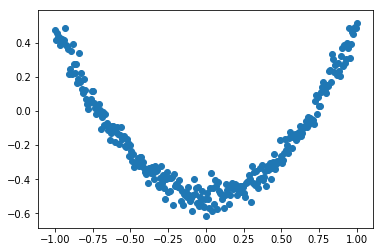

In [25]:
#利用matplotlib库使神经网络训练过程可视化
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def add_layer(data, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size], dtype='float32'))
    biases = tf.Variable(tf.zeros([1, out_size], dtype='float32') + 1.)
    matrix = tf.matmul(data, weights) + biases
    if activation_function is None:
        outputs = matrix
    else:
        outputs = activation_function(matrix)
    return outputs


xs = np.linspace(-1, 1, 300, dtype='float32')[:, np.newaxis]
noise = np.random.normal(0, 0.05, xs.shape).astype('float32')
ys = np.square(xs) - 0.5 + noise

x_data = tf.placeholder(dtype='float32', shape=[None, 1])
y_data = tf.placeholder(dtype='float32', shape=[None, 1])

l1 = add_layer(x_data, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.square(y_data - prediction), 0)
train = tf.train.GradientDescentOptimizer(0.09).minimize(loss)
init = tf.global_variables_initializer()
data_dict = {x_data: xs, y_data: ys}
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xs, ys)
plt.ylim(-0.6, 0.6)
plt.ion()#plt.ion()使图像显示后就自动关闭
plt.show()

with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict=data_dict)
        #每20次迭代，显示一次图像，由于lines未设置ion所以显示后还会存在
        if i % 20 == 0:
            try:
                ax.lines.remove(lines[0])#移除前一个曲线图像
            except Exception:#Exception为众多错误的总类
                pass
            prediction_value = sess.run(prediction, feed_dict= {x_data: xs})
            lines = ax.plot(xs, prediction_value, 'r-', lw=5 )
            plt.pause(0.2)#暂停0.2s
            print(sess.run(loss, feed_dict=data_dict))

In [3]:
#利用tensorboard可是化神经网络结构
import tensorflow as tf

with tf.name_scope('inputs'):#name='inputs'
    xs = tf.placeholder('float32', [None, 1], 'x_in')#dtype,shape,name
    ys = tf.placeholder('float32', [None, 1], 'y_in')


def add_layer(data, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):#name='layer’，首先命名层，然后再命名神经层下的各个变量
        with tf.name_scope('weights'):
            weights = tf.Variable(tf.random_normal([in_size, out_size], dtype='float32'), name='W')#size='[, ]'
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 1, name='B')
        with tf.name_scope('Wx_plus_B'):
            matrix = tf.add(tf.matmul(data, weights), biases)
        if activation_function == None:
            outputs = matrix
        else:
            outputs = activation_function(matrix)
        return outputs
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(ys - prediction))#input_tensor=tf....,axis=0
with tf.name_scope('train'):
    train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#learning_rate=0.1，loss=loss

with tf.Session() as sess:
    tf.summary.FileWriter('logs/', sess.graph)#将sess中的表写入同文件夹下的logs文档中

In [1]:
#利用tensorborad可视化神经网络的训练过程
import tensorflow as tf
import numpy as np


def add_layer(data, in_size, out_size, layer_n=None, activation_function=None):
    layer_name = 'layer%s'%layer_n
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            weights = tf.Variable(tf.random.normal([in_size, out_size], dtype='float32'), name='w')
        tf.summary.histogram(layer_name + '/W', weights)
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.5, name='b')
        tf.summary.histogram(layer_name + 'b', biases)
        with tf.name_scope('wx_plus_b'):
            matrix = tf.add(tf.matmul(data, weights), biases)
        if activation_function == None:
            outputs = matrix
        else:
            outputs = activation_function(matrix)
        tf.summary.histogram(layer_name + '/outputs', outputs)
        return outputs
    
x_data = np.linspace(-1, 1, 300, dtype='float32')[:, np.newaxis]
noise = np.random.normal(1, 0.05, x_data.shape).astype('float32')
y_data = np.square(x_data) - 0.3 + noise

xs = tf.placeholder('float32', [None, 1])
ys = tf.placeholder('float32', [None, 1])

l1 = add_layer(xs, 1, 10, layer_n=1, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, layer_n=2, activation_function=None)

loss = tf.reduce_mean(tf.square(ys-prediction))
tf.summary.scalar('loss', loss)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('logs/', sess.graph)
    for i in range(1000):
        sess.run(train, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            rs = sess.run(merged, feed_dict={xs:x_data, ys:y_data})
            writer.add_summary(rs, i)